# Lie Factor Quantification

Teng-Jui Lin

- Created: 2023-05-28
- Edited: 2024-05-28

In [1]:
from bar_constants import *
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Control Experiment Bar Graphs

(0.0, 60.0)

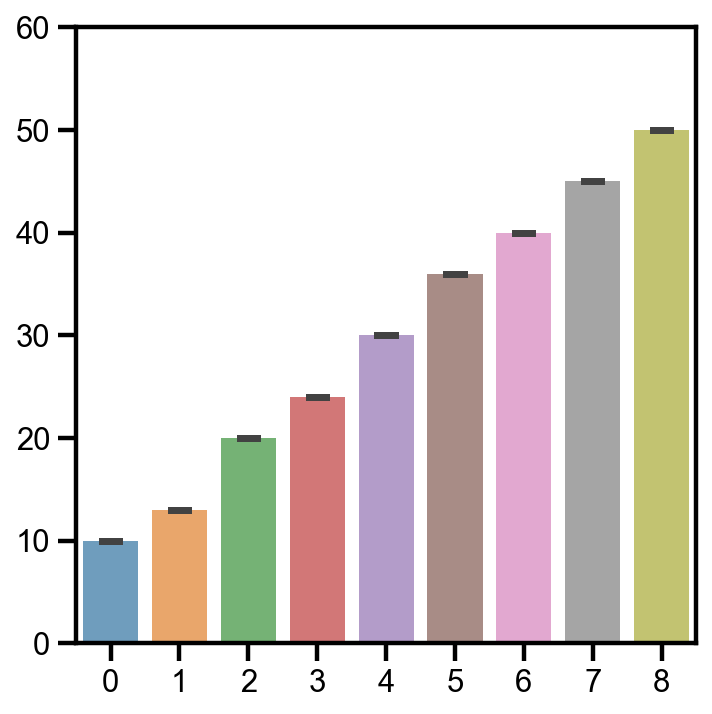

In [4]:
bar_df = pd.DataFrame(np.hstack([
    10 + np.zeros([SAMPLE_SIZE, 1]), 
    13 + np.zeros([SAMPLE_SIZE, 1]), 
    20 + np.zeros([SAMPLE_SIZE, 1]), 
    24 + np.zeros([SAMPLE_SIZE, 1]), 
    30 + np.zeros([SAMPLE_SIZE, 1]), 
    36 + np.zeros([SAMPLE_SIZE, 1]), 
    40 + np.zeros([SAMPLE_SIZE, 1]), 
    45 + np.zeros([SAMPLE_SIZE, 1]), 
    50 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 60)

(0.0, 140.0)

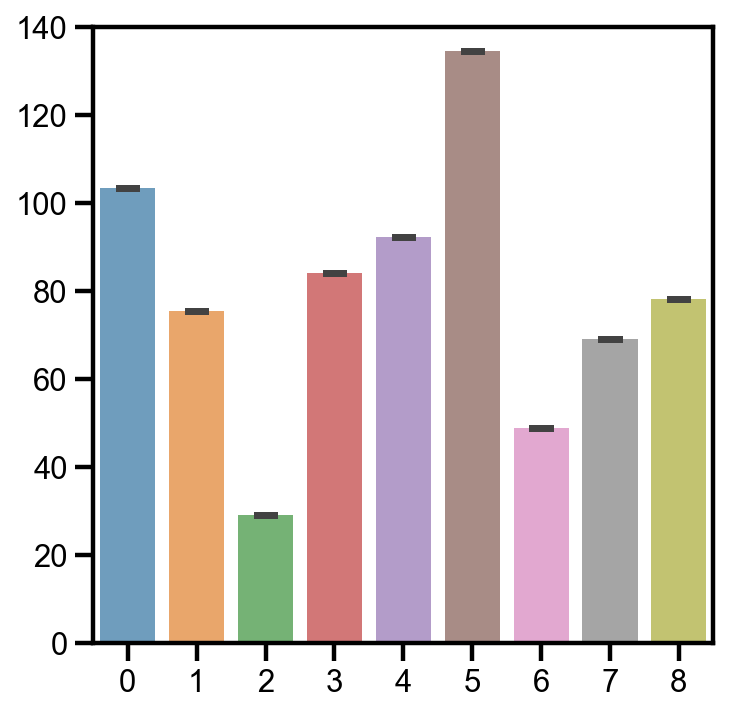

In [5]:
bar_df = pd.DataFrame(np.hstack([
    103.4 + np.zeros([SAMPLE_SIZE, 1]), 
    75.6 + np.zeros([SAMPLE_SIZE, 1]), 
    29.2 + np.zeros([SAMPLE_SIZE, 1]), 
    84.1 + np.zeros([SAMPLE_SIZE, 1]), 
    92.3 + np.zeros([SAMPLE_SIZE, 1]), 
    134.6 + np.zeros([SAMPLE_SIZE, 1]), 
    48.9 + np.zeros([SAMPLE_SIZE, 1]), 
    69.3 + np.zeros([SAMPLE_SIZE, 1]), 
    78.3 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 140)

### Calculation of Lie Factor

In [6]:
data_df = pd.read_csv('sample-data.csv', header=None, index_col=0)
data_df.columns = ['log', 'linear']
data_df

,log,linear
0,,
Bar0,0.015676,0.195238
Bar1,0.018682,0.271429
Bar2,0.017493,0.242857
Bar3,0.107978,1.033333
Bar4,0.140481,1.147619
Bar5,0.479681,1.680952
Bar6,0.097831,0.990476
Bar7,0.061727,0.790476
Bar8,0.109168,1.038095


In [7]:
comb_arr = np.array(list(itertools.permutations(data_df['log'], 2)))
log_comb_effect = pd.Series(np.diff(comb_arr).reshape(-1) / comb_arr[:, 0]).to_frame()
comb_arr = np.array(list(itertools.permutations(data_df['linear'], 2)))
linear_comb_effect = pd.Series(np.diff(comb_arr).reshape(-1) / comb_arr[:, 0]).to_frame()
lie_factor_df = linear_comb_effect / log_comb_effect

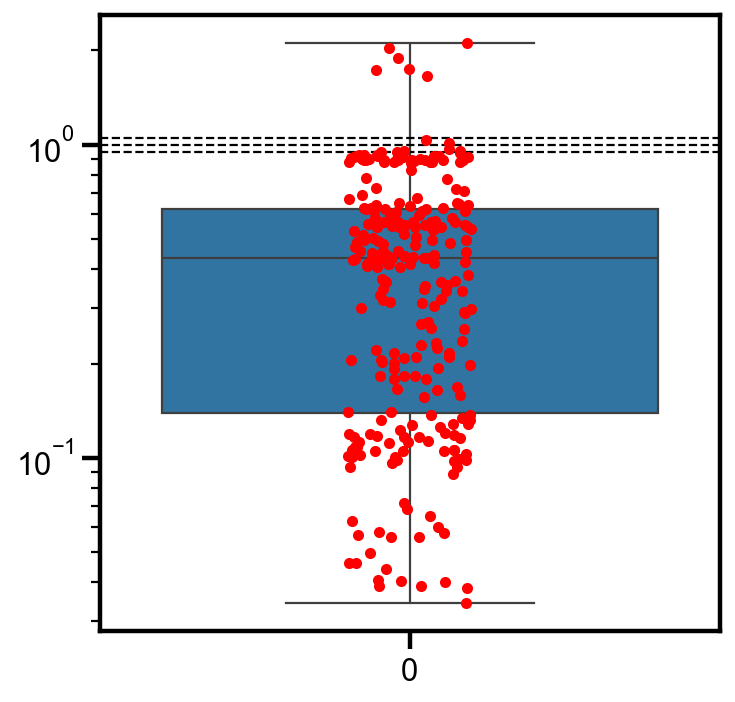

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_yscale('log')
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=True,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)